In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_context('paper')

import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_lg")

In [2]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103


[WDM] - Driver [C:\Users\milin\.wdm\drivers\chromedriver\win32\83.0.4103.39\chromedriver.exe] found in cache


In [3]:
driver.get("https://theprint.in/ilanomics/this-recession-is-different-india-can-bounce-back-much-faster-than-in-the-past/439612/")

In [4]:
content = driver.page_source
soup = BeautifulSoup(content)

In [5]:
all_paras = soup.find_all('p')

In [6]:
text = ''
for p in all_paras:
    text += p.get_text()

In [7]:
print(text)

The US is now officially in recession. According to the World Bank, 90 per cent of countries will be in recession in 2020 — the worst in eight decades. According to most forecasts, the global gross domestic product (GDP) is expected to contract. India will be in the same boat. The silver lining is that recent data suggests that employment has already started picking up in the country.This recession, driven by the Covid-19 pandemic, is unique. Unlike past recessions, it is not driven by oil price shocks or a financial crisis. The contraction in the production of goods and services has resulted not from an inherent weakness in the economy, but because of executive decisions. Although it has created both demand and supply problems, predictions of a multi-year impact on economies may be excessively pessimistic. Previous recessions were often triggered by permanent shocks. Economies thus required a longer adjustment period to reach the new equilibrium.Also read: Targeted policies, managing 

In [8]:
document = nlp(text)
displacy.render(document, style = "ent",jupyter = True)

In [9]:
entities=[(str(i), i.label_) for i in document.ents]
print(entities)
entities_df = pd.DataFrame(entities, columns =['Entity', 'Label'])
entities_df.head()

[('US', 'GPE'), ('the World Bank', 'ORG'), ('90 per cent', 'MONEY'), ('2020', 'DATE'), ('eight decades', 'DATE'), ('India', 'GPE'), ('Gita Gopinath’s', 'PERSON'), ('Covid', 'NORP'), ('the National Bureau of Economic Research', 'ORG'), ('NBER', 'ORG'), ('several months', 'DATE'), ('NBER', 'ORG'), ('NBER', 'ORG'), ('the first quarter of this year', 'DATE'), ('NBER Business Cycle Dating Committee', 'ORG'), ('2009', 'DATE'), ('February 2020.“The', 'DATE'), ('more than a few months', 'DATE'), ('NBER', 'ORG'), ('fasterThe World Bank’s', 'ORG'), ('June 2020', 'DATE'), ('this year', 'DATE'), ('1870.Not', 'CARDINAL'), ('first', 'ORDINAL'), ('at least 60 years', 'DATE'), ('the World Bank', 'ORG'), ('6.2 per cent', 'MONEY'), ('1945-', 'DATE'), ('Latin American', 'NORP'), ('first', 'ORDINAL'), ('US', 'GPE'), ('2020', 'DATE'), ('3', 'CARDINAL'), ('Nirmala Sitharaman', 'PERSON'), ('Indian', 'NORP'), ('India', 'GPE'), ('2009', 'DATE'), ('the National Institute of Public Finance and Policy', 'ORG'), (

,Entity,Label
0,US,GPE
1,the World Bank,ORG
2,90 per cent,MONEY
3,2020,DATE
4,eight decades,DATE


In [20]:
counts = entities_df['Label'].value_counts()
counts

DATE        23
ORG         19
NORP         9
GPE          8
CARDINAL     5
PERSON       3
MONEY        3
ORDINAL      2
EVENT        1
Name: Label, dtype: int64

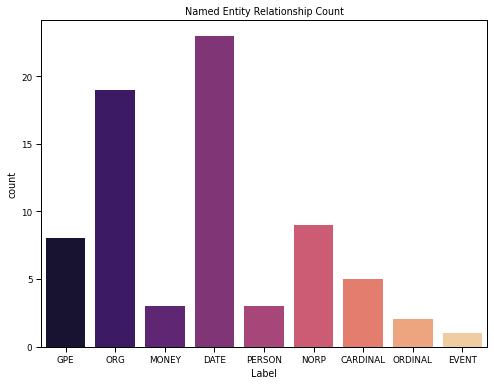

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Label', data = entities_df, palette = 'magma')
plt.title('Named Entity Relationship Count')
plt.show()